In [65]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 

In [66]:
def mjd_to_orbital_phase(mjd):
    """this converts mjd to orbital phase"""
    # coefficients from the quadratic ephemeris
    T0 = 43076.32            # reference MJD
    P = 16.57794             # orbital period (days)
    P_dot = -4.01e-5    # quadratic coefficient (change in period)

    # quadratic coefficients for ax^2 + bx + c = 0
    a = P_dot
    b = P
    c = T0 - mjd

    # solve for N
    discriminant = b**2 - 4*a*c
    #if discriminant < 0:
     #   raise ValueError("No real solution for cycle number N.")

    N1 = (-b + np.sqrt(discriminant)) / (2*a)
    N2 = (-b - np.sqrt(discriminant)) / (2*a)
    bpos = N1 > 0
    N = np.copy(N2)
    N[bpos] = N1[bpos]
    # choose the solution that makes sense
    #N = N1 if N1 > 0 else N2

    # compute orbital phase
    phase = N % 1  # fractional part of N
    return phase, N  # return N

In [67]:
# Convert
mjd_example = 62000
phase, cycle = mjd_to_orbital_phase(mjd_example)
print(f"MJD: {mjd_example}, Cycle: {cycle:.4f}, Orbital Phase: {phase:.4f}")

MJD: 62000, Cycle: 1144.6670, Orbital Phase: 0.6670


In [68]:
mjds_start, mjds_end, flux, error = np.loadtxt("X-1.Ch.T.H._2.0-6.0keV_gsclc.dat",unpack=True)
phases_start, cycles = mjd_to_orbital_phase(mjds_start)
phases_end, cycles = mjd_to_orbital_phase(mjds_end)

print(phases_start)
print(phases_end)

[0.67187509 0.71864377 0.75363334 ... 0.77368467 0.83232974 0.89490496]
[0.68011039 0.75010774 0.80843817 ... 0.82859261 0.89116923 0.94983264]


In [69]:
help(mjd_to_orbital_phase)

Help on function mjd_to_orbital_phase in module __main__:

mjd_to_orbital_phase(mjd)
    this converts mjd to orbital phase



Text(0, 0.5, 'flux')

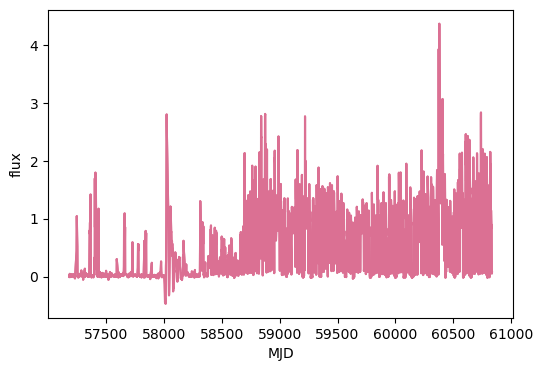

In [70]:
plt.figure(figsize=(6,4))
plt.plot(mjds_start, flux, "-",color = 'palevioletred')
plt.plot(mjds_end, flux, "-",color = 'palevioletred')
plt.xlabel("MJD")
plt.ylabel("flux")

Text(0, 0.5, 'flux')

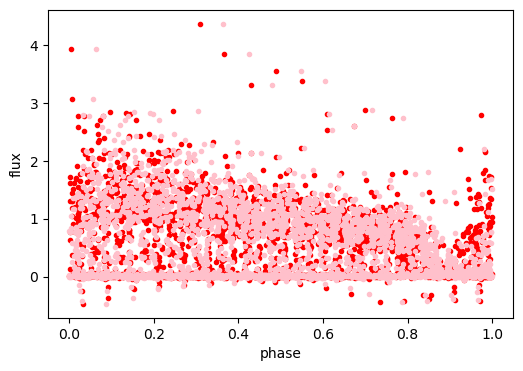

In [72]:
plt.figure(figsize=(6,4))
plt.plot(phases_start, flux, "o",color = 'red',markersize = '3')
plt.plot(phases_end, flux, "o",color = 'pink', markersize = '3')
plt.xlabel("phase")
plt.ylabel("flux")